<a href="https://colab.research.google.com/github/ahmedelhodaiby/Numerical-Optimization-ITI/blob/main/Practical_Session_3_Momentum_NAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0, 20)
y = -2 * x + 1

#### Plot your data points. 

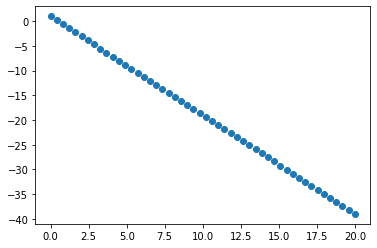

In [ ]:
plt.scatter(x, y)
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [ ]:
def gradientDescentSingleVar(x_data, y_data, alpha, max_iterations):
    theta0 = 0
    theta1 = 0
    costList = []
    theta0_list = []
    theta1_list = []
    hypothesis_list = []
    for i in range(max_iterations):
        hypothesis = theta0 + theta1 * x_data
        hypothesis_list.append(hypothesis)
        error = hypothesis - y_data
        cost = np.sum(((error)**2))/len(x_data)
        costList.append(cost)
        gradient_theta0 = (1/len(x_data))*sum(error)
        gradient_theta1 = (1/len(x_data))*sum(error * x_data)
        theta0 = theta0 - alpha * gradient_theta0
        theta0_list.append(theta0)
        theta1 = theta1 - alpha * gradient_theta1
        theta1_list.append(theta1)
        if((gradient_theta0**2 + gradient_theta1**2) < 1e-3):
            print("it took {} iterations".format(i))
            break
    return theta0_list, theta1_list, costList, hypothesis_list, theta0, theta1

In [ ]:
theta0_list, theta1_list, costList, hypothesis_list, theta0, theta1 = gradientDescentSingleVar(x, y, 0.011,1000)

it took 790 iterations


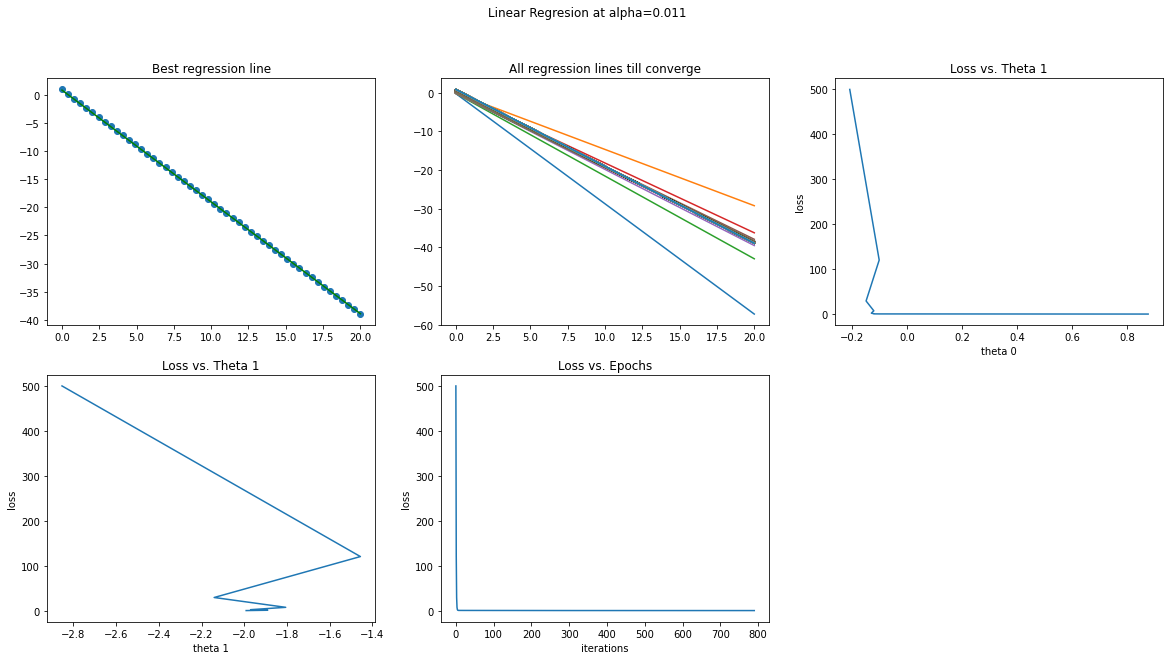

In [ ]:
fig = plt.figure(figsize=(20, 10))

axis1 = fig.add_subplot(231)
plt.scatter(x, y)
yplot = theta0_list[-1] + theta1_list[-1] * x
axis1.plot(x, yplot, 'g')

axis2 = fig.add_subplot(232)
for i in range(len(theta0_list)):
    ypoint = theta0_list[i] + theta1_list[i] * x
    axis2.plot(x, ypoint)


axis3 = fig.add_subplot(233)
axis3.plot(theta0_list, costList)
plt.xlabel("theta 0")
plt.ylabel("loss")

axis4 = fig.add_subplot(234)
plt.plot(theta1_list, costList)
plt.xlabel("theta 1")
plt.ylabel("loss")

axis5 = fig.add_subplot(235)
plt.plot(costList)
plt.xlabel("iterations")
plt.ylabel("loss")

fig.suptitle("Linear Regresion at alpha=0.011")
axis1.set_title("Best regression line")
axis2.set_title("All regression lines till converge")
axis3.set_title("Loss vs. Theta 1")
axis4.set_title("Loss vs. Theta 1")
axis5.set_title("Loss vs. Epochs")

plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

![image.png](attachment:image.png)

#### γ takes values between 0 and 1.
![image.png](attachment:image.png)

In [ ]:
def gradientDescentMomentum(x_data, y_data, alpha, gamma, max_iterations):
    theta0 = 0
    theta1 = 0
    v0 = 0
    v1 = 0
    costList = []
    theta0_list = []
    theta1_list = []
    hypothesis_list = []
    for i in range(max_iterations):
        hypothesis = theta0 + theta1 * x_data
        hypothesis_list.append(hypothesis)

        error = hypothesis - y_data
        cost = np.sum(((error)**2))/len(x_data)
        costList.append(cost)

        gradient_theta0 = (1/len(x_data))*sum(error)
        gradient_theta1 = (1/len(x_data))*sum(error * x_data)

        v0 = gamma * v0 + alpha * gradient_theta0 
        v1 = gamma * v1 + alpha * gradient_theta1 

        theta0 = theta0 - v0
        theta1 = theta1 - v1
        theta0_list.append(theta0)
        theta1_list.append(theta1)
    return theta0_list, theta1_list, costList, hypothesis_list, theta0, theta1

In [ ]:
theta0_listMoment, theta1_listMoment, costListMoment, hypothesis_listMoment, theta0Moment, theta1Moment = gradientDescentMomentum(x, y, 0.001, 0.9, 1000)

In [ ]:
r2_score(y, hypothesis_listMoment[-1])

0.9999866342811538

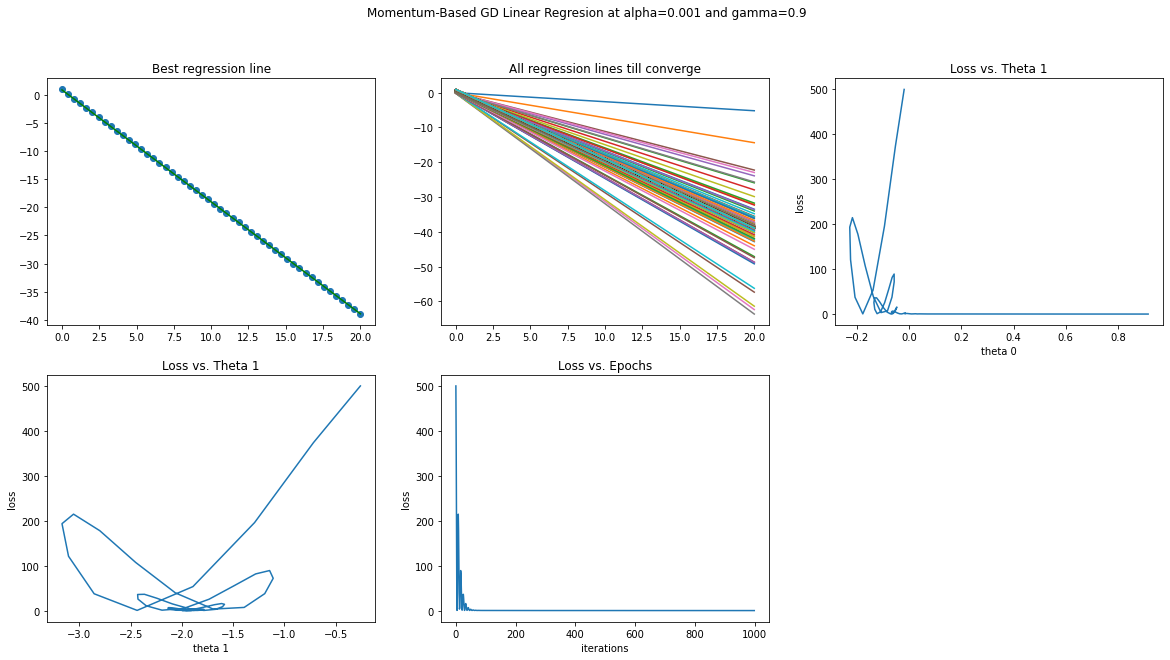

In [ ]:
fig = plt.figure(figsize=(20, 10))

axis1 = fig.add_subplot(231)
plt.scatter(x, y)
yplot = theta0_listMoment[-1] + theta1_listMoment[-1] * x
axis1.plot(x, yplot, 'g')

axis2 = fig.add_subplot(232)
for i in range(len(theta0_listMoment)):
    ypoint = theta0_listMoment[i] + theta1_listMoment[i] * x
    axis2.plot(x, ypoint)


axis3 = fig.add_subplot(233)
axis3.plot(theta0_listMoment, costListMoment[: len(theta0_listMoment)])
plt.xlabel("theta 0")
plt.ylabel("loss")

axis4 = fig.add_subplot(234)
plt.plot(theta1_listMoment, costListMoment[: len(theta0_listMoment)])
plt.xlabel("theta 1")
plt.ylabel("loss")

axis5 = fig.add_subplot(235)
plt.plot(costListMoment)
plt.xlabel("iterations")
plt.ylabel("loss")

fig.suptitle("Momentum-Based GD Linear Regresion at alpha=0.001 and gamma=0.9")
axis1.set_title("Best regression line")
axis2.set_title("All regression lines till converge")
axis3.set_title("Loss vs. Theta 1")
axis4.set_title("Loss vs. Theta 1")
axis5.set_title("Loss vs. Epochs")

plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [ ]:
theta0_listMoment0, theta1_listMoment0, costListMoment0, hypothesis_listMoment0, theta0Moment0, theta1Moment0 = gradientDescentMomentum(x, y, 0.001, 0, 1000)
r2_score(y, hypothesis_listMoment0[-1])

0.9985480092049996

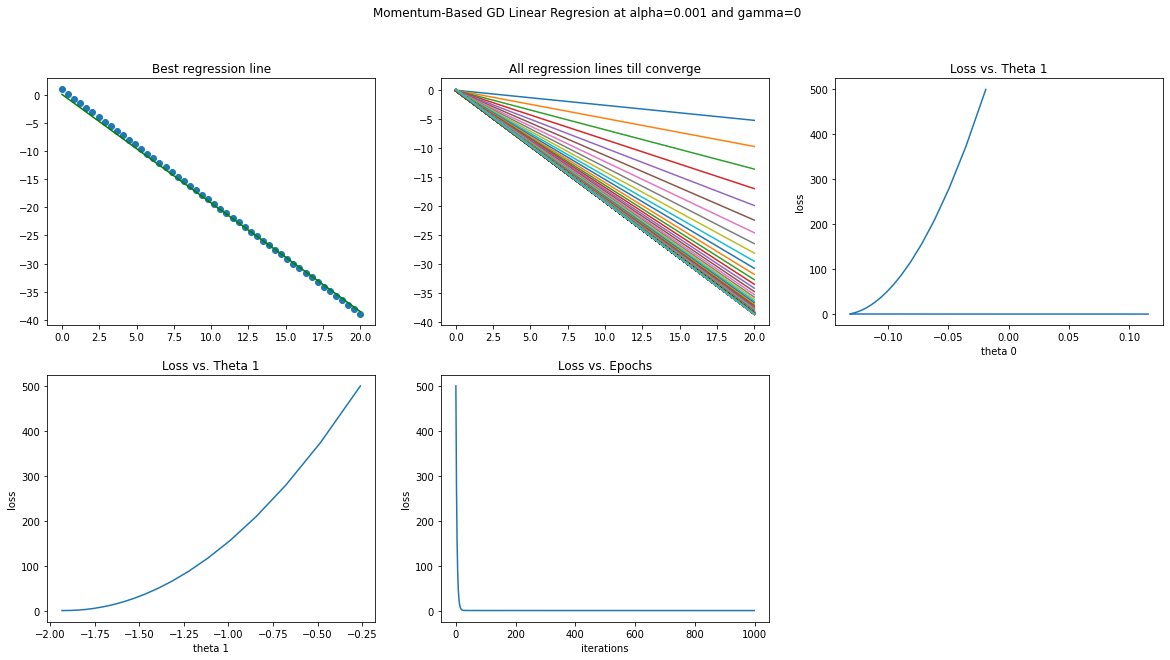

In [ ]:
fig = plt.figure(figsize=(20, 10))

axis1 = fig.add_subplot(231)
plt.scatter(x, y)
yplot = theta0_listMoment0[-1] + theta1_listMoment0[-1] * x
axis1.plot(x, yplot, 'g')

axis2 = fig.add_subplot(232)
for i in range(len(theta0_listMoment0)):
    ypoint = theta0_listMoment0[i] + theta1_listMoment0[i] * x
    axis2.plot(x, ypoint)


axis3 = fig.add_subplot(233)
axis3.plot(theta0_listMoment0, costListMoment0[: len(theta0_listMoment0)])
plt.xlabel("theta 0")
plt.ylabel("loss")

axis4 = fig.add_subplot(234)
plt.plot(theta1_listMoment0, costListMoment0[: len(theta0_listMoment0)])
plt.xlabel("theta 1")
plt.ylabel("loss")

axis5 = fig.add_subplot(235)
plt.plot(costListMoment0)
plt.xlabel("iterations")
plt.ylabel("loss")

fig.suptitle("Momentum-Based GD Linear Regresion at alpha=0.001 and gamma=0")
axis1.set_title("Best regression line")
axis2.set_title("All regression lines till converge")
axis3.set_title("Loss vs. Theta 1")
axis4.set_title("Loss vs. Theta 1")
axis5.set_title("Loss vs. Epochs")

plt.show()

### Update your Batch GD for one variable  implementation to be NAG and check your results

![image.png](attachment:image.png)

In [4]:
def gradientDescentNAG(x_data, y_data, alpha, gamma, max_iterations):
    v0 = 0;             v1 = 0
    theta0 = 0;         theta1 = 0
    thetaTemp0 = 0;     thetaTemp1 = 0
    gradient_Temp0 = 0; gradient_Temp1 = 0
    v0 = 0
    v1 = 0
    costList = []
    theta0_list = []
    theta1_list = []
    hypothesis_list = []
    for i in range(max_iterations):
        thetaTemp0 = thetaTemp0 - gamma * v0
        thetaTemp1 = thetaTemp1 - gamma * v1

        hypothesis = thetaTemp0 + thetaTemp1 * x_data
        hypothesis_list.append(hypothesis)

        error = hypothesis - y_data
        cost = np.sum(((error)**2))/len(x_data)
        costList.append(cost)

        gradient_Temp0 = (1/len(x_data))*sum(error)
        gradient_Temp1 = (1/len(x_data))*sum(error * x_data)

        v0 = gamma * v0 + alpha * gradient_Temp0 
        v1 = gamma * v1 + alpha * gradient_Temp1 

        theta0 = thetaTemp0 - alpha * gradient_Temp0 
        theta1 = thetaTemp1 - alpha * gradient_Temp1
        theta0_list.append(theta0)
        theta1_list.append(theta1)
    return theta0_list, theta1_list, costList, hypothesis_list, theta0, theta1

In [5]:
theta0_listNAG, theta1_listNAG, costListNAG, hypothesis_listNAG, theta0NAG, theta1NAG = gradientDescentNAG(x, y, 0.001, 0.9, 1000)

In [6]:
r2_score(y, hypothesis_listNAG[-1])

0.9999772463952251

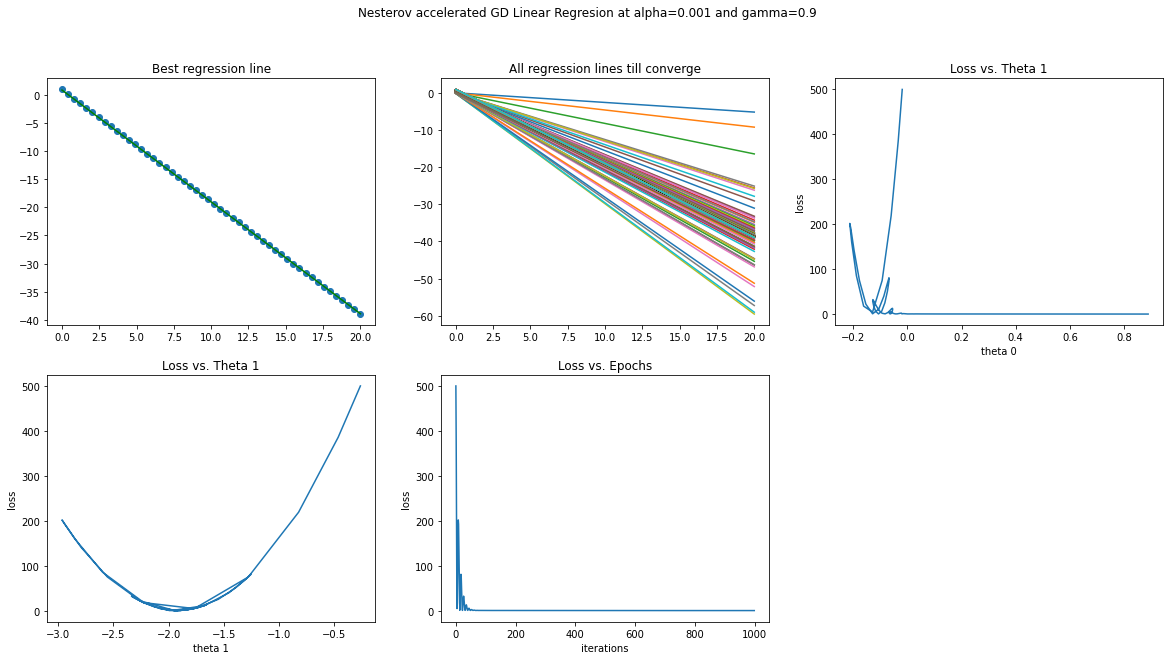

In [7]:
fig = plt.figure(figsize=(20, 10))

axis1 = fig.add_subplot(231)
plt.scatter(x, y)
yplot = theta0_listNAG[-1] + theta1_listNAG[-1] * x
axis1.plot(x, yplot, 'g')

axis2 = fig.add_subplot(232)
for i in range(len(theta0_listNAG)):
    ypoint = theta0_listNAG[i] + theta1_listNAG[i] * x
    axis2.plot(x, ypoint)


axis3 = fig.add_subplot(233)
axis3.plot(theta0_listNAG, costListNAG[: len(theta0_listNAG)])
plt.xlabel("theta 0")
plt.ylabel("loss")

axis4 = fig.add_subplot(234)
plt.plot(theta1_listNAG, costListNAG[: len(theta0_listNAG)])
plt.xlabel("theta 1")
plt.ylabel("loss")

axis5 = fig.add_subplot(235)
plt.plot(costListNAG)
plt.xlabel("iterations")
plt.ylabel("loss")

fig.suptitle("Nesterov accelerated GD Linear Regresion at alpha=0.001 and gamma=0.9")
axis1.set_title("Best regression line")
axis2.set_title("All regression lines till converge")
axis3.set_title("Loss vs. Theta 1")
axis4.set_title("Loss vs. Theta 1")
axis5.set_title("Loss vs. Epochs")

plt.show()

## Congratulations 
![image.png](attachment:image.png)